In [93]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns  
from sklearn.ensemble import RandomForestClassifier

In [94]:
df = pd.read_csv("IUBAT_Clean1.csv")
df.head()

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),Lighting_Level,PMV_Level
0,0,0,2,620,1,18,11,2,1,290,2,28,62,443,1,4
1,0,0,2,617,2,25,9,3,2,300,2,30,53,449,4,0
2,0,0,2,603,2,24,9,3,2,300,3,27,57,445,2,4
3,0,0,2,603,1,21,14,3,2,310,4,27,63,443,3,2
4,0,0,2,909,2,23,9,3,2,320,3,30,55,451,4,0


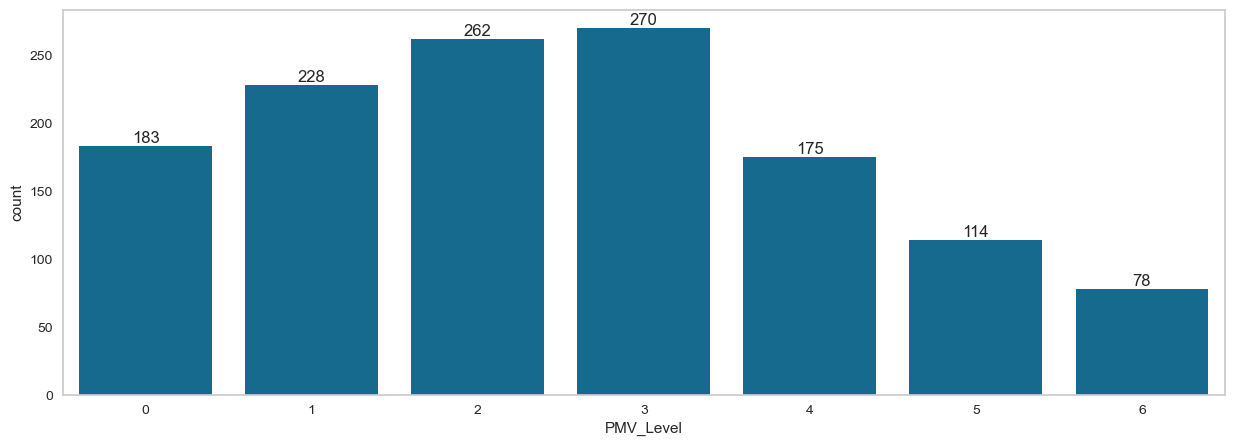

In [95]:
# Adding Values to Seaborn Count Plots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.grid()
ax = sns.countplot(data=df, x='PMV_Level', )

for label in ax.containers:
    ax.bar_label(label)
    
plt.show()


In [96]:
df['PMV_Level'].value_counts()

PMV_Level
3    270
2    262
1    228
0    183
4    175
5    114
6     78
Name: count, dtype: int64

In [97]:
 #displaying categories of values for each column with its count
col_names = list(df.columns.values) #update columns names

for i in col_names:
    print(df[i].value_counts(dropna=False))

Gender
0    1259
1      51
Name: count, dtype: int64
Age
0    1252
1      58
Name: count, dtype: int64
Study_Level
2    780
3    486
4     44
Name: count, dtype: int64
Floor_Level
603    72
620    65
803    64
804    60
904    60
       ..
701     1
534     1
579     1
552     1
618     1
Name: count, Length: 123, dtype: int64
Room_Orientation
1    834
2    447
0     29
Name: count, dtype: int64
No_Lights
25    312
24    250
23    198
21    172
22     94
26     92
19     43
18     35
20     30
16     22
12     19
15     19
11      7
10      6
13      4
17      4
14      3
Name: count, dtype: int64
No_Fans
9     471
11    204
12    187
10    134
13     94
14     66
6      39
5      32
8      32
7      31
15     20
Name: count, dtype: int64
No_Windows
3    1021
2     151
4     100
5      38
Name: count, dtype: int64
No_Doors
2    914
1    396
Name: count, dtype: int64
Floor_Area
320    422
300    117
280     50
318     45
319     40
301     39
317     37
316     36
270     28
302     27


<Axes: >

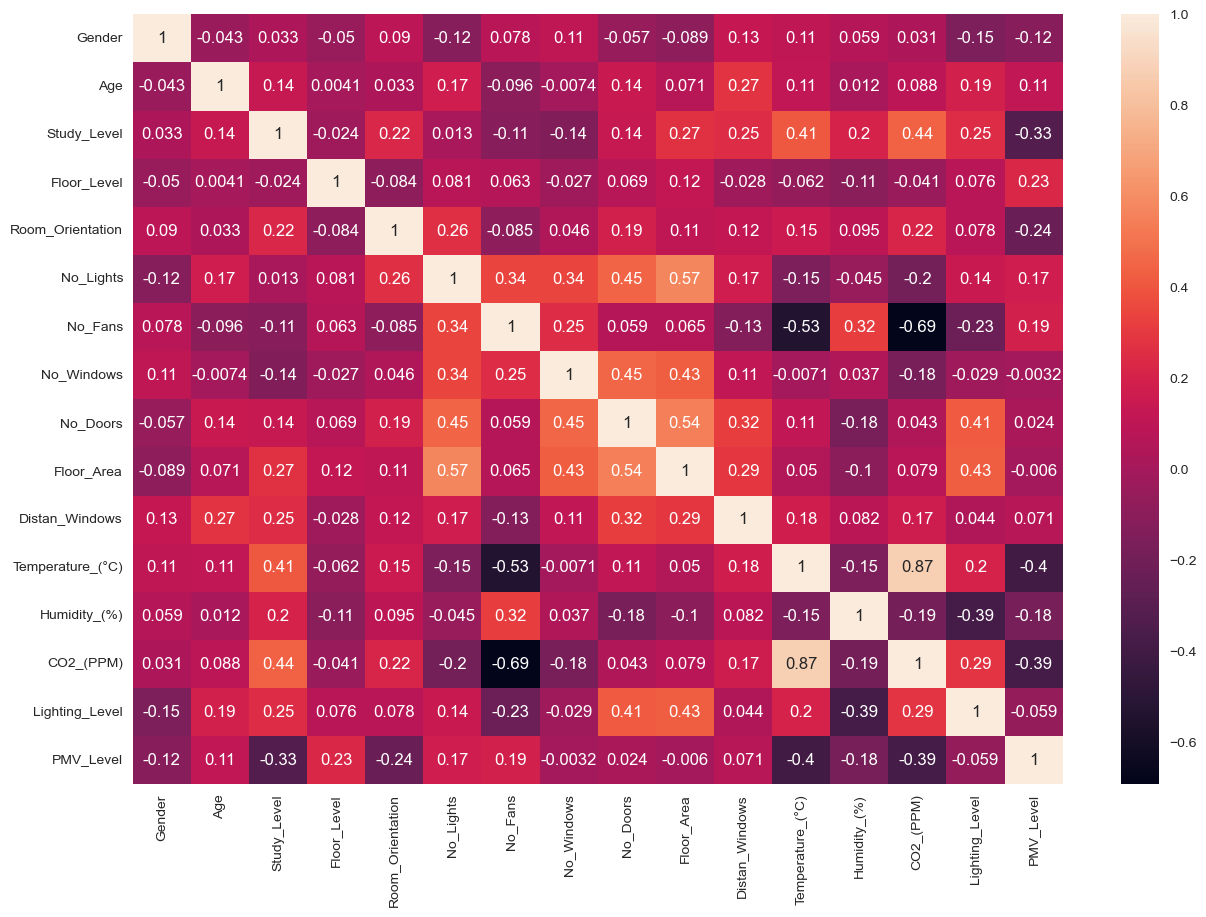

In [98]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [99]:
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

In [100]:
df.head()  

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),Lighting_Level,PMV_Level
0,0,0,2,620,0,18,11,2,1,290,0,28,62,443,0,0
1,0,0,2,617,1,25,9,3,2,300,0,30,53,449,1,1
2,0,0,2,603,1,24,9,3,2,300,1,27,57,445,2,0
3,0,0,2,603,0,21,14,3,2,310,2,27,63,443,3,2
4,0,0,2,909,1,23,9,3,2,320,1,30,55,451,1,1


In [101]:
#Filter any variables with low variance (close to zero) to avoid overfitting
df.var()

Gender                  0.037444
Age                     0.042347
Study_Level             0.313592
Floor_Level         22578.332466
Room_Orientation        0.281378
No_Lights               9.287598
No_Fans                 4.275136
No_Windows              0.307504
No_Doors                0.211072
Floor_Area            222.779424
Distan_Windows          0.914893
Temperature_(°C)        2.118718
Humidity_(%)           24.489042
CO2_(PPM)              12.283769
Lighting_Level          3.455563
PMV_Level               2.896379
dtype: float64

In [102]:
inputs = df.drop(['PMV_Level',], axis=1)

In [103]:
target = df['PMV_Level']

In [104]:
inputs

,Gender,Age,Study_Level,Floor_Level,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),Lighting_Level
0,0,0,2,620,0,18,11,2,1,290,0,28,62,443,0
1,0,0,2,617,1,25,9,3,2,300,0,30,53,449,1
2,0,0,2,603,1,24,9,3,2,300,1,27,57,445,2
3,0,0,2,603,0,21,14,3,2,310,2,27,63,443,3
4,0,0,2,909,1,23,9,3,2,320,1,30,55,451,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,3,605,0,16,12,2,1,270,0,30,64,445,0
1306,0,0,2,804,1,25,9,3,2,311,1,30,53,449,5
1307,0,0,3,804,0,23,9,2,1,313,1,29,53,447,3
1308,0,0,3,801,1,22,9,3,2,313,2,30,57,451,5


In [105]:
target

0       0
1       1
2       0
3       2
4       1
       ..
1305    1
1306    5
1307    3
1308    1
1309    3
Name: PMV_Level, Length: 1310, dtype: uint8

In [106]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [107]:
df['PMV_Level'].value_counts()

PMV_Level
3    270
2    262
4    228
1    183
0    175
5    114
6     78
Name: count, dtype: int64

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [109]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN

In [110]:
y.value_counts()

PMV_Level
3    270
2    262
4    228
1    183
0    175
5    114
6     78
Name: count, dtype: int64

In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [112]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =42) # 75 - 25 split   (test_size=0.20)

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Split dataset into train and test (stratify to keep class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=118, 
)

# Initialize SMOTEENN sampler
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN only on training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print(f"Original training set size: {X_train.shape[0]}")
print(f"Resampled training set size: {X_resampled.shape[0]}")

# Train Random Forest classifier on resampled data
clf = RandomForestClassifier(criterion='entropy', min_samples_split=3, min_samples_leaf= 1, max_depth=10,)
clf.fit(X_resampled, y_resampled)

# Predict on test set (which remains untouched)
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Original training set size: 1048
Resampled training set size: 1197
Accuracy on test set: 0.9007633587786259

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82        34
           1       0.93      0.84      0.89        32
           2       0.85      0.79      0.82        52
           3       0.95      0.96      0.95        55
           4       0.98      0.90      0.94        52
           5       0.96      0.96      0.96        27
           6       1.00      1.00      1.00        10

    accuracy                           0.90       262
   macro avg       0.91      0.91      0.91       262
weighted avg       0.91      0.90      0.90       262


Confusion matrix:
 [[32  1  0  1  0  0  0]
 [ 0 27  4  0  0  1  0]
 [ 8  1 41  1  1  0  0]
 [ 2  0  0 53  0  0  0]
 [ 2  0  3  0 47  0  0]
 [ 0  0  0  1  0 26  0]
 [ 0  0  0  0  0  0 10]]


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split dataset into train and test (stratify to keep class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Initialize SMOTEENN sampler
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN only on training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print(f"Original training set size: {X_train.shape[0]}")
print(f"Resampled training set size: {X_resampled.shape[0]}")

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(10, 31)),
    "min_samples_split": [2, 3, 4, 5, 6, 8],
    "min_samples_leaf": list(range(1, 15)),
    "n_estimators": [100, 200, 300, 400, 500],
    "max_features": ["sqrt", "log2", None]
}

# Initialize Random Forest
rfc = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
rfc_cv = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=50,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
    cv=5,
    random_state=0,
    error_score='raise'  # <-- This will raise errors immediately
)

# Fit RandomizedSearchCV on the resampled training data
rfc_cv.fit(X_resampled, y_resampled)

# Best estimator from RandomizedSearchCV
best_rf = rfc_cv.best_estimator_
print(f"\nBest hyperparameters found:\n{rfc_cv.best_params_}")

# Predict on the untouched test set
y_pred = best_rf.predict(X_test)

# Evaluate model performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Original training set size: 1048
Resampled training set size: 1223
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best hyperparameters found:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 14, 'criterion': 'entropy'}
Accuracy on test set: 0.8778625954198473

Classification report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81        35
           1       0.88      0.97      0.92        37
           2       0.90      0.73      0.81        52
           3       0.96      0.89      0.92        54
           4       0.93      0.82      0.87        45
           5       1.00      0.96      0.98        23
           6       0.88      0.88      0.88        16

    accuracy                           0.88       262
   macro avg       0.89      0.89      0.88       262
weighted avg       0.89      0.88      0.88       262


Confusion matrix:
 [[35  0  0  0  0  0  0]
 

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define parameter distribution (use lists or distributions)
param_dist = {
    "criterion": ["gini", "entropy"], 
    "max_depth": list(range(10, 17)), 
    "min_samples_split": [2, 3, 4, 6, 8], 
    "min_samples_leaf": list(range(1, 15)), 
}

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
rfc_cv = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=50,               # Number of parameter settings that are sampled
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    cv=5,
    random_state=42
)

# Fit on training data (use X_resampled, y_resampled if using SMOTEENN)
rfc_cv.fit(X_train, y_train)

# Predictions on test set
predictions = rfc_cv.predict(X_test)

# Best parameters and best score
optimal_params = rfc_cv.best_params_
print(f"\nOptimal parameters: {optimal_params}")

print("\n====BEST MODEL SCORE====")
print("Best cross-validation accuracy:", rfc_cv.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Optimal parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}

====BEST MODEL SCORE====
Best cross-validation accuracy: 0.8922077922077921


In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fit on training data (e.g. resampled if using SMOTEENN)
rfc_cv.fit(X_train, y_train)  # or X_resampled, y_resampled if resampled

# Use the best model to predict on test set
best_model = rfc_cv.best_estimator_
y_pred = best_model.predict(X_test)

# Print best params and best CV accuracy
print(f"\nOptimal parameters: {rfc_cv.best_params_}")
print("\n====BEST MODEL SCORE====")
print("Best cross-validation accuracy:", rfc_cv.best_score_)

# Evaluate on test set
print("\nTest set accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Optimal parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}

====BEST MODEL SCORE====
Best cross-validation accuracy: 0.8922077922077921

Test set accuracy: 0.9083969465648855

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        35
           1       0.97      0.95      0.96        37
           2       0.85      0.88      0.87        52
           3       0.98      0.96      0.97        54
           4       0.97      0.87      0.92        45
           5       1.00      0.96      0.98        23
           6       0.88      0.88      0.88        16

    accuracy                           0.91       262
   macro avg       0.91      0.91      0.91       262
weighted avg       0.92      0.91      0.91       262


Confusion matrix:
 [[30  1  3  0  1  0  0]
 [ 0 35  2  0  0  0  0]
 [ 5  0 46  1  0  0  0

In [117]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, accuracy_score

# 1. Split your data into train/test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0, stratify=y
)

# 2. Apply SMOTEENN to balance training data
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print(f"Original training size: {X_train.shape[0]}")
print(f"Resampled training size: {X_resampled.shape[0]}")

# 3. Initialize the base estimator (Random Forest with chosen params or defaults)
rf = RandomForestClassifier(random_state=42, n_estimators=200)

# 4. Setup StratifiedKFold for RFECV (to handle class imbalance properly)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Setup RFECV
rfecv = RFECV(
    estimator=rf,
    step=1,              # remove one feature at each iteration
    cv=cv,
    scoring='accuracy',  # metric to optimize
    n_jobs=-1,
    verbose=2,
    min_features_to_select=12  # stop when you reach this number of features
)

# 6. Fit RFECV on the resampled training data
rfecv.fit(X_resampled, y_resampled)

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {list(X.columns[rfecv.support_])}")

# 7. Train final model on the selected features
X_res_selected = rfecv.transform(X_resampled)
X_test_selected = rfecv.transform(X_test)

rf_final = RandomForestClassifier(random_state=42, n_estimators=200)
rf_final.fit(X_res_selected, y_resampled)

# 8. Predict & evaluate on test set
y_pred = rf_final.predict(X_test_selected)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Original training size: 1048
Resampled training size: 1227
Optimal number of features: 15
Selected features: ['Gender', 'Age', 'Study_Level', 'Floor_Level', 'Room_Orientation', 'No_Lights', 'No_Fans', 'No_Windows', 'No_Doors', 'Floor_Area', 'Distan_Windows', 'Temperature_(°C)', 'Humidity_(%)', 'CO2_(PPM)', 'Lighting_Level']
Accuracy on test set: 0.8549618320610687

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81        35
           1       0.91      0.81      0.86        37
           2       0.79      0.85      0.81        52
           3       1.00      0.80      0.89        54
           4       0.90      0.84      0.87        45
           5       0.88      1.00      0.94        23
           6       0.75      0.94      0.83        16

    accuracy                           0.85       262
   macro avg       0.85      0.87      0.86       262
weighted avg       0.87      0.85      0.86       262



In [118]:
rfc = RandomForestClassifier(criterion='gini',max_depth=20,n_estimators=1000,max_features='sqrt')

In [119]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=1000)

In [120]:
rfc.score(X_train, y_train)

0.9809160305343512

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

y_predict = rfc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_predict))

Accuracy score: 0.9122137404580153


In [122]:
y_predict = rfc.predict(X_test)

In [123]:
y_predict = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.58
RMSE: 0.76


In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
print("Confusion matrix:")
print(cm)


Accuracy: 0.9122137404580153
Confusion matrix:
[[30  0  3  1  1  0  0]
 [ 1 32  4  0  0  0  0]
 [ 4  1 47  0  0  0  0]
 [ 1  0  0 53  0  0  0]
 [ 5  0  1  0 39  0  0]
 [ 0  0  0  0  0 23  0]
 [ 0  0  0  0  0  1 15]]


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        35
           1       0.97      0.86      0.91        37
           2       0.85      0.90      0.88        52
           3       0.98      0.98      0.98        54
           4       0.97      0.87      0.92        45
           5       0.96      1.00      0.98        23
           6       1.00      0.94      0.97        16

    accuracy                           0.91       262
   macro avg       0.92      0.92      0.92       262
weighted avg       0.92      0.91      0.91       262



In [126]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [127]:
y_predict = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)

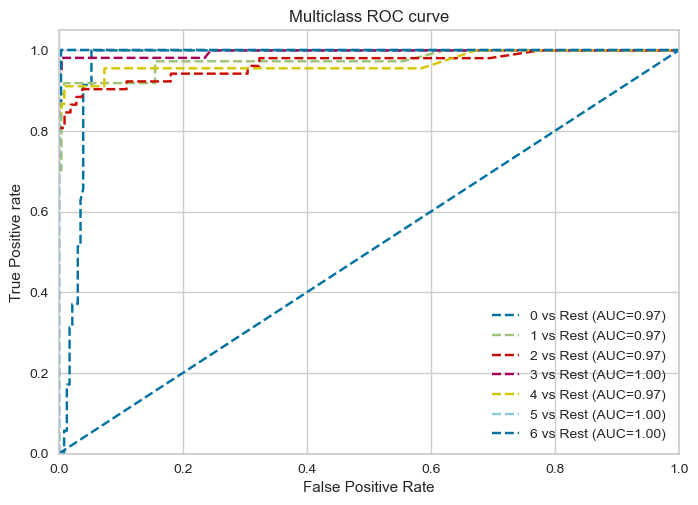

In [128]:
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [129]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, rfc.predict_proba(X_test))
logloss

0.37731788945388745

Text(0.5, 1.0, 'Random Forest Feature Importances (MDI)')

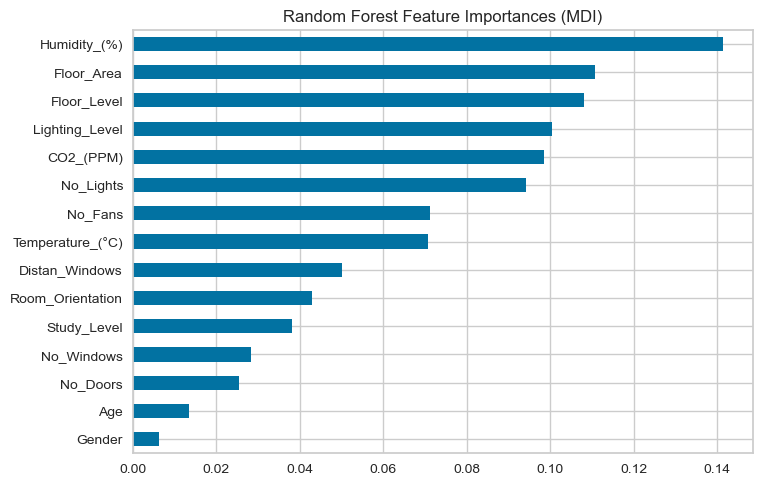

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
plt.title('Random Forest Feature Importances (MDI)')

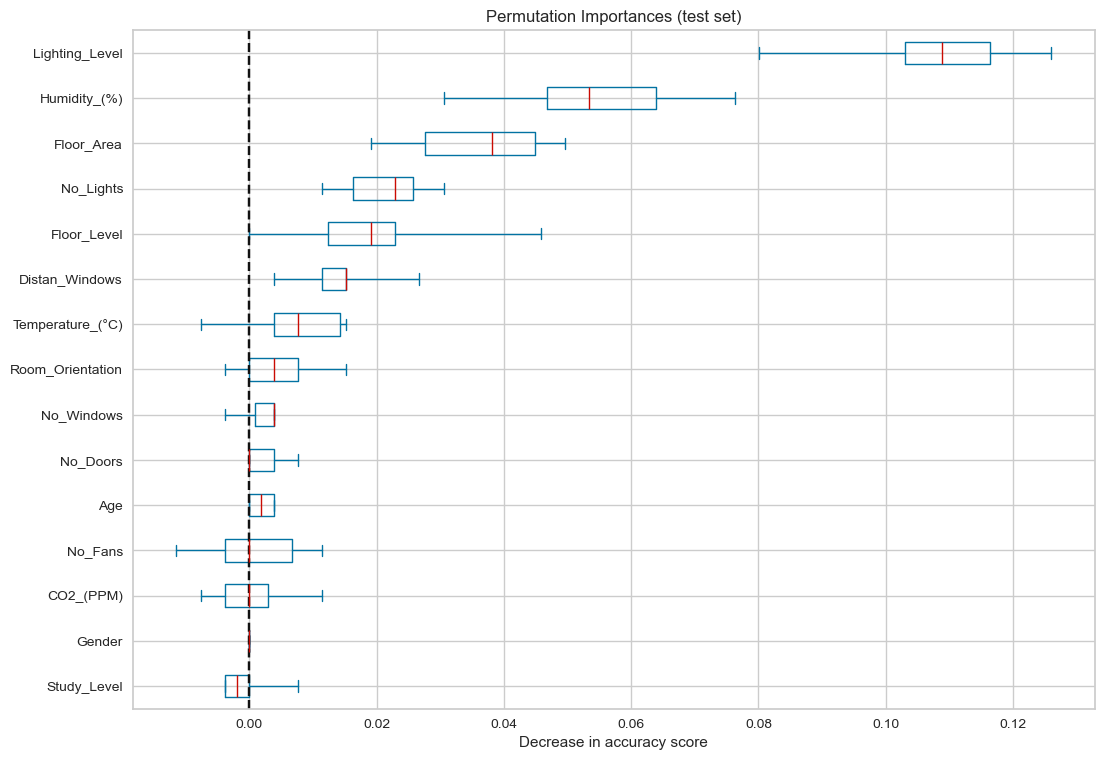

<Figure size 2500x1500 with 0 Axes>

In [131]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

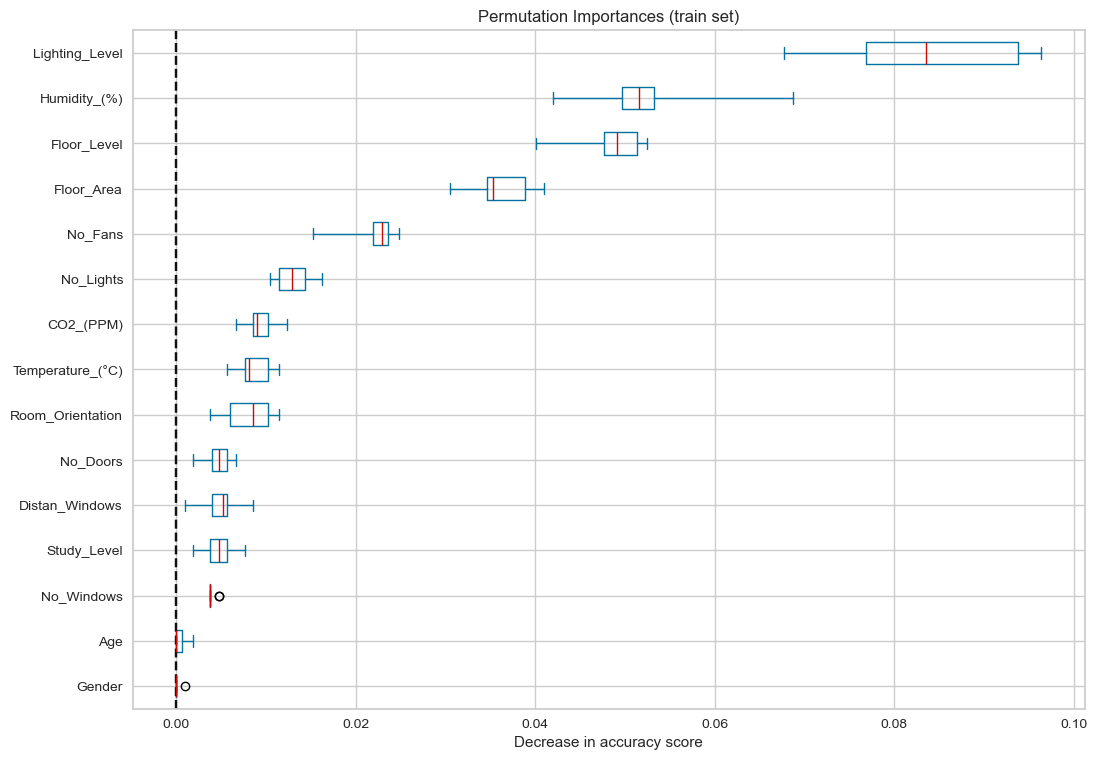

<Figure size 2500x1500 with 0 Axes>

In [132]:
result = permutation_importance(
    rfc, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [133]:
import numpy as np
import pandas as pd

In [134]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

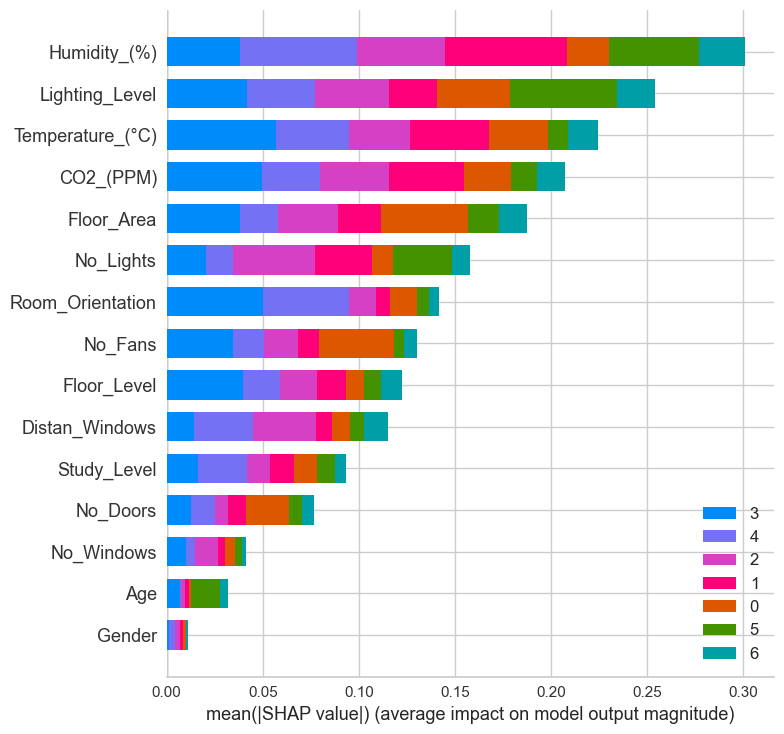

In [135]:
import shap
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=rfc.classes_)

In [136]:
print("Type of shap_values:", type(shap_values))
print("Length of shap_values list:", len(shap_values))  # should be 7 (number of classes)

for i, class_shap in enumerate(shap_values):
    print(f"Class {i} SHAP values shape: {class_shap.shape}")

Type of shap_values: <class 'numpy.ndarray'>
Length of shap_values list: 262
Class 0 SHAP values shape: (15, 7)
Class 1 SHAP values shape: (15, 7)
Class 2 SHAP values shape: (15, 7)
Class 3 SHAP values shape: (15, 7)
Class 4 SHAP values shape: (15, 7)
Class 5 SHAP values shape: (15, 7)
Class 6 SHAP values shape: (15, 7)
Class 7 SHAP values shape: (15, 7)
Class 8 SHAP values shape: (15, 7)
Class 9 SHAP values shape: (15, 7)
Class 10 SHAP values shape: (15, 7)
Class 11 SHAP values shape: (15, 7)
Class 12 SHAP values shape: (15, 7)
Class 13 SHAP values shape: (15, 7)
Class 14 SHAP values shape: (15, 7)
Class 15 SHAP values shape: (15, 7)
Class 16 SHAP values shape: (15, 7)
Class 17 SHAP values shape: (15, 7)
Class 18 SHAP values shape: (15, 7)
Class 19 SHAP values shape: (15, 7)
Class 20 SHAP values shape: (15, 7)
Class 21 SHAP values shape: (15, 7)
Class 22 SHAP values shape: (15, 7)
Class 23 SHAP values shape: (15, 7)
Class 24 SHAP values shape: (15, 7)
Class 25 SHAP values shape: (15, 

In [137]:
print("X_test shape before SHAP:", X_test.shape)

X_test shape before SHAP: (262, 15)


In [138]:
# Convert X_test to numpy array explicitly
shap_values = explainer.shap_values(X_test.values)

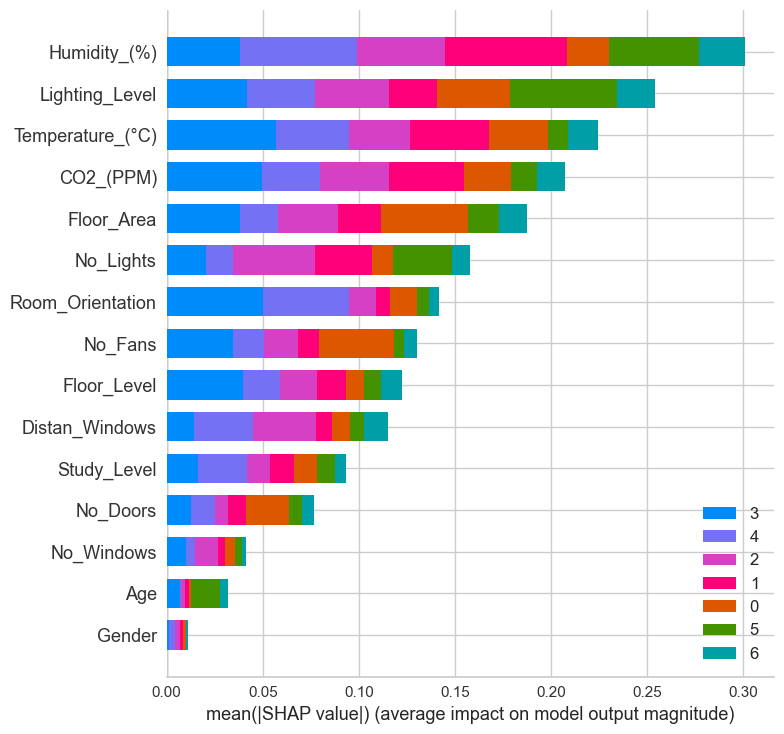

In [139]:
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=rfc.classes_)

In [140]:
import shap

explainer = shap.TreeExplainer(rfc)      # rfc = your trained classifier
shap_values = explainer.shap_values(X_test)

In [141]:
class_idx = 2
shap_values_class = shap_values[class_idx]  # shape: (num_samples, num_features)

In [142]:
shap_values = [explainer.shap_values(x) for x in X_test.values]

In [143]:
import shap

explainer = shap.TreeExplainer(rfc)  # rf = your trained RandomForest model
shap_values = explainer.shap_values(X_test)  # shap_values is a list with 7 arrays

In [144]:
print("Shape of shap_values[2]:", shap_values[2].shape)
print("Shape of X_test:", X_test.shape)

Shape of shap_values[2]: (15, 7)
Shape of X_test: (262, 15)


In [145]:
for i, sv in enumerate(shap_values):
    print(f"Class {i} shap_values shape: {sv.shape}")

Class 0 shap_values shape: (15, 7)
Class 1 shap_values shape: (15, 7)
Class 2 shap_values shape: (15, 7)
Class 3 shap_values shape: (15, 7)
Class 4 shap_values shape: (15, 7)
Class 5 shap_values shape: (15, 7)
Class 6 shap_values shape: (15, 7)
Class 7 shap_values shape: (15, 7)
Class 8 shap_values shape: (15, 7)
Class 9 shap_values shape: (15, 7)
Class 10 shap_values shape: (15, 7)
Class 11 shap_values shape: (15, 7)
Class 12 shap_values shape: (15, 7)
Class 13 shap_values shape: (15, 7)
Class 14 shap_values shape: (15, 7)
Class 15 shap_values shape: (15, 7)
Class 16 shap_values shape: (15, 7)
Class 17 shap_values shape: (15, 7)
Class 18 shap_values shape: (15, 7)
Class 19 shap_values shape: (15, 7)
Class 20 shap_values shape: (15, 7)
Class 21 shap_values shape: (15, 7)
Class 22 shap_values shape: (15, 7)
Class 23 shap_values shape: (15, 7)
Class 24 shap_values shape: (15, 7)
Class 25 shap_values shape: (15, 7)
Class 26 shap_values shape: (15, 7)
Class 27 shap_values shape: (15, 7)
Cl

In [146]:
#importing random forest classifier and recursive feature elemenation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

scores = []
for i in range(1,X.shape[1]):
    rfc = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select= i)
    rfc.fit(X_train, y_train)

    y_predict = rfc.predict(X_test)
    #printing the number of selected features and its accuracy after each iteration
    print('Number of Selected features: ', i)
    sc = accuracy_score(y_test, y_predict)
    print('accuracy score:', sc)
    print()
    scores.append(sc)

Number of Selected features:  1
accuracy score: 0.40076335877862596

Number of Selected features:  2
accuracy score: 0.6564885496183206

Number of Selected features:  3
accuracy score: 0.8320610687022901

Number of Selected features:  4
accuracy score: 0.8664122137404581

Number of Selected features:  5
accuracy score: 0.8931297709923665

Number of Selected features:  6
accuracy score: 0.8893129770992366

Number of Selected features:  7
accuracy score: 0.8893129770992366

Number of Selected features:  8
accuracy score: 0.8969465648854962

Number of Selected features:  9
accuracy score: 0.9007633587786259

Number of Selected features:  10
accuracy score: 0.9007633587786259

Number of Selected features:  11
accuracy score: 0.9083969465648855

Number of Selected features:  12
accuracy score: 0.9045801526717557

Number of Selected features:  13
accuracy score: 0.9122137404580153

Number of Selected features:  14
accuracy score: 0.916030534351145



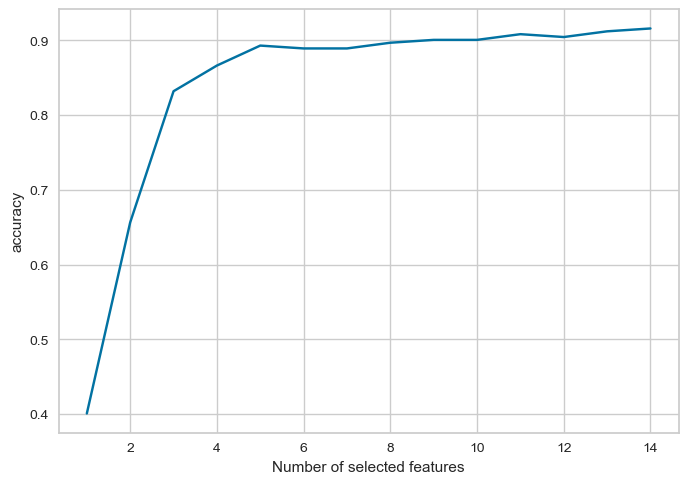

In [147]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("accuracy")
plt.plot(
    range(1, 15),
    scores,
)
plt.show()

In [148]:
rfc.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [149]:
features = X_train.columns[rfc.get_support()]
features

Index(['Age', 'Study_Level', 'Floor_Level', 'Room_Orientation', 'No_Lights',
       'No_Fans', 'No_Windows', 'No_Doors', 'Floor_Area', 'Distan_Windows',
       'Temperature_(°C)', 'Humidity_(%)', 'CO2_(PPM)', 'Lighting_Level'],
      dtype='object')

In [150]:
excluded_feature = list(set(X_train.columns) - set(features))
print(excluded_feature)

['Gender']


In [151]:
#drop features from X
X = X.drop(['No_Doors'], axis=1)

In [152]:
#updating train & test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [153]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(n_estimators=100,)
rfe = RFECV(
    estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,
)
rfe.fit(X_train,y_train)
print(f"Optimal number of features: {rfe.n_features_}")

Optimal number of features: 12


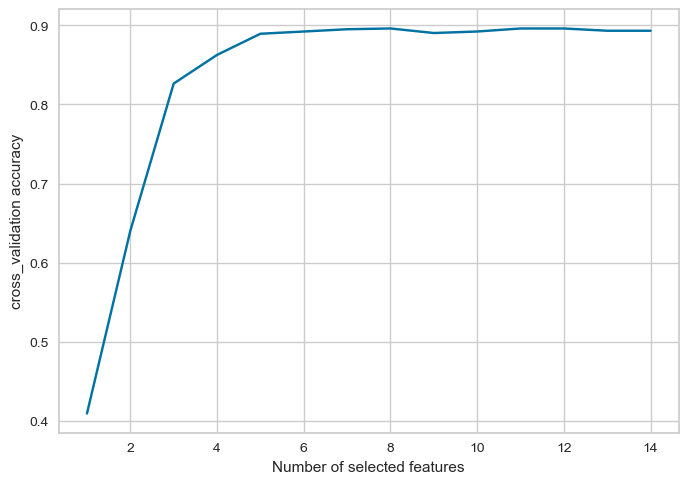

In [154]:
n_scores = len(rfe.cv_results_)
plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("cross_validation accuracy")
plt.plot(
    range (1,len (rfe.cv_results_["mean_test_score"])+1),
    rfe.cv_results_["mean_test_score"],)

plt.show()

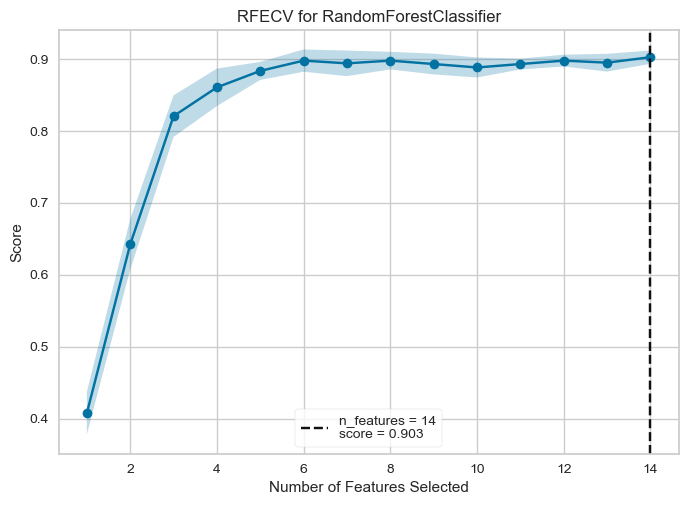

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [155]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear RF classifier
visualizer = RFECV(estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,)

visualizer.fit(X_train,y_train)    # Fit the data to the visualizer
visualizer.show()                  # Finalize and render the figure

#The shaded area represents the variability of cross-validation, 
#one standard deviation above and below the mean accuracy score drawn by the curve.

In [57]:
for depth in [5,6,7,8,10,11,12,13,14,15, 16, 17]:
    rfc = RandomForestClassifier(max_depth=depth)
    rfc.fit(X_train, y_train)
    print(f'Depth: {depth}. Score: {rfc.score(X_train, y_train)}')

Depth: 5. Score: 0.6210018105009053
Depth: 6. Score: 0.6584188292094146
Depth: 7. Score: 0.7229933614966807
Depth: 8. Score: 0.7604103802051901
Depth: 10. Score: 0.8261919130959565
Depth: 11. Score: 0.8376584188292094
Depth: 12. Score: 0.8461074230537116
Depth: 13. Score: 0.8503319251659626
Depth: 14. Score: 0.8515389257694629
Depth: 15. Score: 0.8515389257694629
Depth: 16. Score: 0.8515389257694629
Depth: 17. Score: 0.8515389257694629


In [58]:
for criterion in ['gini', 'entropy', 'log_loss',]:
    rfc = RandomForestClassifier(criterion=criterion)
    rfc.fit(X_train, y_train)
    print(f'criterion: {criterion}. Score: {rfc.score(X_train, y_train)}')

criterion: gini. Score: 0.8515389257694629
criterion: entropy. Score: 0.8515389257694629
criterion: log_loss. Score: 0.8515389257694629


In [59]:
for min_samples_split in [2,3,4,5,]:
    rfc = RandomForestClassifier(min_samples_split=min_samples_split)
    rfc.fit(X_train, y_train)
    print(f'min_samples_split: {min_samples_split}. Score: {rfc.score(X_train, y_train)}')

min_samples_split: 2. Score: 0.8515389257694629
min_samples_split: 3. Score: 0.8509354254677127
min_samples_split: 4. Score: 0.8430899215449608
min_samples_split: 5. Score: 0.8286059143029572


In [60]:
for min_samples_leaf in [1,2,3,4,5,]:
    rfc = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train, y_train)
    print(f'min_samples_leaf: {min_samples_leaf}. Score: {rfc.score(X_train, y_train)}')

min_samples_leaf: 1. Score: 0.8515389257694629
min_samples_leaf: 2. Score: 0.791792395896198
min_samples_leaf: 3. Score: 0.7579963789981895
min_samples_leaf: 4. Score: 0.7386843693421846
min_samples_leaf: 5. Score: 0.7205793602896802


In [61]:
for max_features in ['sqrt','log2',]:
    rfc = RandomForestClassifier(max_features=max_features)
    rfc.fit(X_train, y_train)
    print(f'max_features: {max_features}. Score: {rfc.score(X_train, y_train)}')

max_features: sqrt. Score: 0.8515389257694629
max_features: log2. Score: 0.8515389257694629


# Tree_Visualization

In [62]:
rfc = RandomForestClassifier(criterion='gini',max_depth=11,n_estimators=100, min_samples_leaf=1,min_samples_split= 3,max_leaf_nodes=25, )

rfc = rfc.fit(X_train, y_train)
print('Testing Set Evaluation Accuracy: ',
      accuracy_score(y_test,rfc.predict(X_test)))

Testing Set Evaluation Accuracy:  0.5493975903614458


In [63]:
_ = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, filled=True)

NameError: name 'tree' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[2], feature_names=X.columns, filled=True)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rfc.estimators_[2], 
                           feature_names=X.columns,
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [ ]:
graph.render('RF_Tree_PMV')